# Домашнє завдання
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів `Keras`, яка буде класифікувати товари із датасету [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist).

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

* кількість шарів;
* кількість нейронів;
* функції активації;
* кількість епох;
* розмір батчу;
* вибір оптимізатора;
* різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

## Imports

In [1]:
import random
import numpy as np

from keras import layers, models
from keras.datasets import fashion_mnist

from sklearn.metrics import (
  classification_report,
  confusion_matrix,
  ConfusionMatrixDisplay,
)

import matplotlib.pyplot as plt
%matplotlib inline

## Load DataSet

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

### Normalization

In [3]:
train_data, test_data = train_data / 255.0, test_data / 255.0

### Visualization

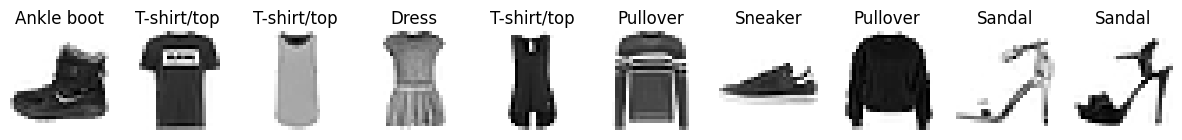

In [4]:
num_images = 10

plt.figure(figsize=(15, 5))
for i in range(num_images):
  plt.subplot(1, num_images, i + 1)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
plt.show()

## Model

### Define model parameters

In [5]:
class ModelParameters:
  training_epochs = 32 # максимальне число епох
  batch_size = 64 # кількість зразків, які використовуються для кожного пакету під час навчання моделі
  input_shape = (28, 28) # Вирівнювання вхідних даних

  layer_1 = 1024 # кількість нейронів 1-го шару
  layer_2 = 512 # кількість нейронів 2-го шару
  layer_3 = 256 # кількість нейронів 2-го шару
  layer_4 = 128 # кількість нейронів 2-го шару
  out_layer = len(class_names) # кількість нейронів вихідного шару

  layer_1_activation = 'relu' # Функція активації 1-го шару
  layer_1_dropout = 0.2 # Dropout для регуляризації  1-го шару
  layer_2_activation = 'sigmoid' # Функція активації 2-го шару
  layer_2_dropout = 0.2 # Dropout для регуляризації 2-го шару
  layer_3_activation = 'relu' # Функція активації 3-го шару
  layer_3_dropout = 0.2 # Dropout для регуляризації 3-го шару
  layer_4_activation = 'sigmoid' # Функція активації 4-го шару
  layer_4_dropout = 0.2 # Dropout для регуляризації 4-го шару
  out_layer_activation = 'softmax' # Функція активації вихідного шару

  optimizer = 'adam' # Тип оптимізатора
  loss_func = 'sparse_categorical_crossentropy' # Тип фунції втрат
  metrics=['accuracy'] # Метрики моделі

model_param = ModelParameters()

### Creating model

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=model_param.input_shape),
    layers.Dense(model_param.layer_1, activation=model_param.layer_1_activation),
    layers.Dropout(model_param.layer_1_dropout),
    layers.Dense(model_param.layer_2, activation=model_param.layer_2_activation),
    layers.Dropout(model_param.layer_2_dropout),
    layers.Dense(model_param.layer_3, activation=model_param.layer_3_activation),
    layers.Dropout(model_param.layer_3_dropout),
    layers.Dense(model_param.layer_4, activation=model_param.layer_4_activation),
    layers.Dropout(model_param.layer_4_dropout),
    layers.Dense(model_param.out_layer, activation=model_param.out_layer_activation),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

### Compile model

In [8]:
model.compile(
  optimizer = model_param.optimizer,
  loss = model_param.loss_func,
  metrics = model_param.metrics
)

### Model training

In [9]:
history = model.fit(
  x = train_data,
  y = train_labels,
  batch_size = model_param.batch_size,
  epochs = model_param.training_epochs,
  validation_data = (test_data, test_labels),
  verbose=0
)

### Model evaluation

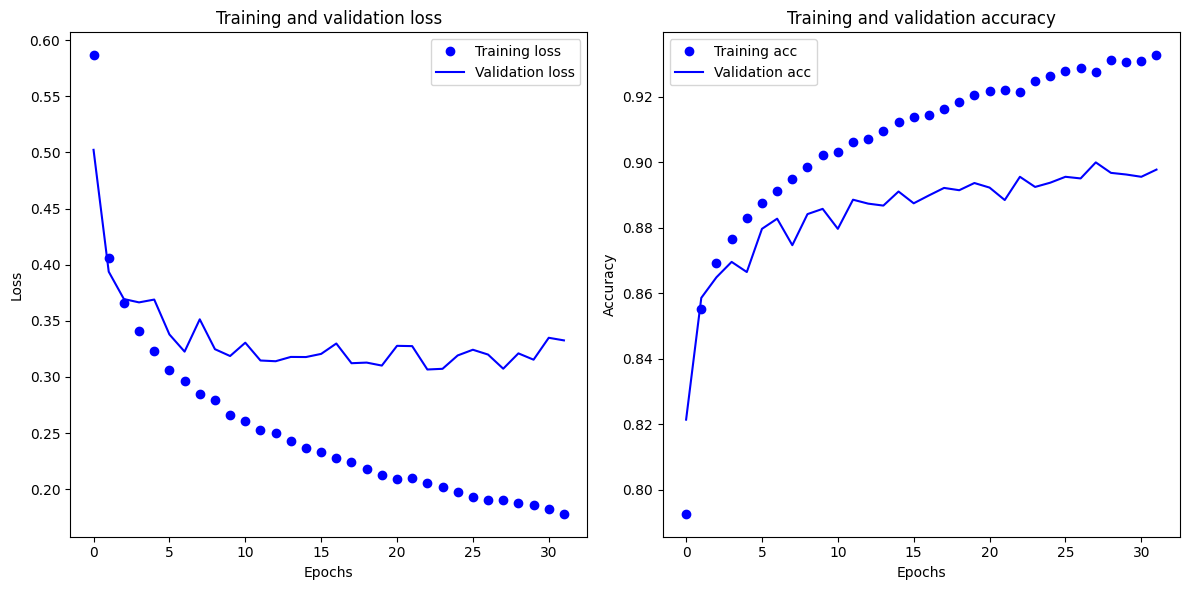

In [10]:
history_dict = history.history

epochs = range(model_param.training_epochs)

plt.figure(figsize=(12, 6))

# Виведення графіка функції втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Виведення графіка точності
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%\nTest loss: {np.round(test_loss, 2)}')

Test accuracy: 89.78%
Test loss: 0.33


## Results

### Classification report

In [12]:
predictions = model.predict(test_data, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_classes, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.81      0.84      0.82      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.80      0.84      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.80      0.65      0.72      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Confusion Matrix

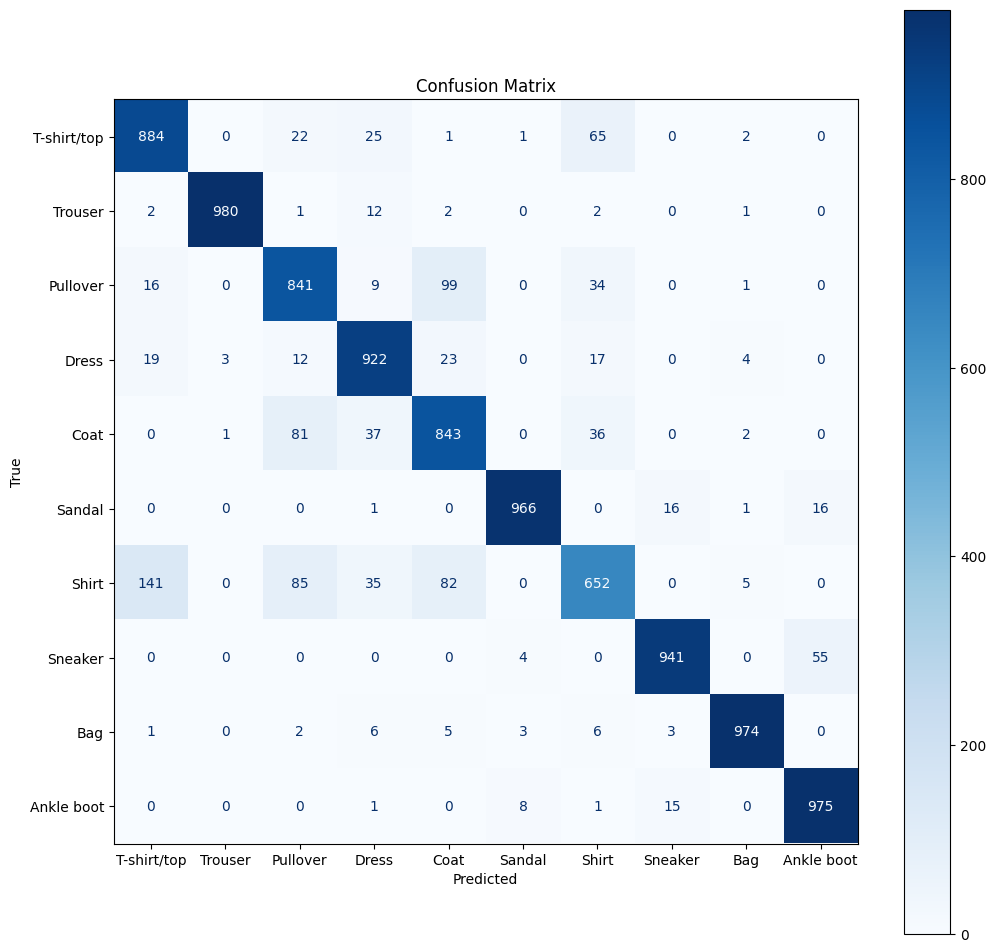

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(test_labels, predicted_classes, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Test with images

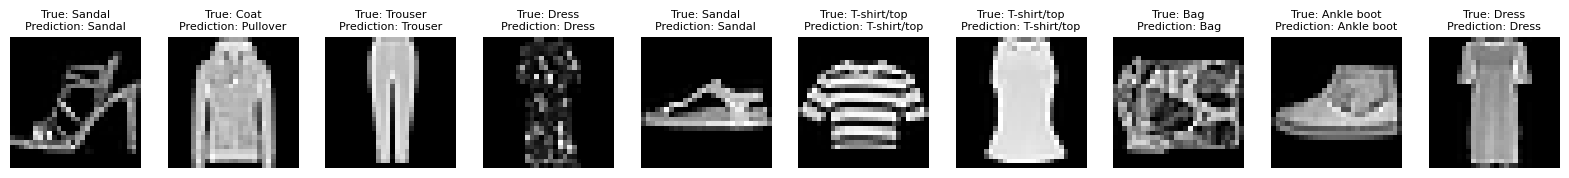

Accuracy with 10 images: 90.00%


In [14]:
random_indices = random.sample(range(len(test_data)), 10)
images = test_data[random_indices]
labels = test_labels[random_indices]

predictions = model.predict(images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].reshape((28, 28)), cmap='gray')
    plt.title(f"True: {class_names[labels[i]]}\nPrediction: {class_names[predicted_labels[i]]}", fontsize = 8)
    plt.axis('off')

plt.show()

correct_predictions = (predicted_labels == labels)
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Accuracy with 10 images: {accuracy * 100:.2f}%")

### Model parameters

In [15]:
print(f'Model parameters:\n')
for key, value in model_param.__class__.__dict__.items():
  if not key.startswith("__"):
    print(f'{key}: {value}')

Model parameters:

training_epochs: 32
batch_size: 64
input_shape: (28, 28)
layer_1: 1024
layer_2: 512
layer_3: 256
layer_4: 128
out_layer: 10
layer_1_activation: relu
layer_1_dropout: 0.2
layer_2_activation: sigmoid
layer_2_dropout: 0.2
layer_3_activation: relu
layer_3_dropout: 0.2
layer_4_activation: sigmoid
layer_4_dropout: 0.2
out_layer_activation: softmax
optimizer: adam
loss_func: sparse_categorical_crossentropy
metrics: ['accuracy']
